**USING UNLABELLED AND LABELLED IMAGES (WEED DETECTION DATA SETS)**

Import the necessary libraries and packages.

In [10]:
import cv2
import urllib
import numpy as np
from PIL import Image as im
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

**Step 1: Reading the desired image. i)** Define the file paths to the data when it has been downloaded to your local machine.
**ii)** Define the names of the images you want to load.
**iii)** Use the cv2 imread function with the desired file paths,file names and the file_type provided to read the image files.

Awesome work! The resulting variable contains your image.


In [11]:
file_path='C:/Users/Aspire/Downloads/'
file_path_labelled='C:/Users/Aspire/Downloads/Label_'

file_name=1
file_type='.png'

unlabelled=cv2.imread(file_path + str(file_name) + file_type)
labelled=cv2.imread(file_path_labelled + str(file_name) + file_type) 

Alternatively, copy the url to the desired image as the file_url and run the commented code block *instead* of the one above.

In [12]:
#file_url='https://raw.githubusercontent.com/Jade98-afk/FAAIR_OpenData_Tutorial/main/1.png'
#file_url_labelled='https://raw.githubusercontent.com/Jade98-afk/FAAIR_OpenData_Tutorial/main/Label_1.png'
#unlabelled = bytearray(urllib.request.urlopen(file_url).read())
#labelled = bytearray(urllib.request.urlopen(file_url_labelled).read())


**Step 2. Accessing the pixel data from the image.**
**i)** If you would like to use the pixel data in the RGB pixel arrangement format, then use the cv2 cvtColor function to convert to RGB representation. This does not change how the image appears.
**ii)** Convert each image to a numpy array using the numpy asarray function. The resulting numpy array contains the pixel values for each of the channels (red,green,blue). 

*At this point, you can perform any image augmentation techniques before saving and downloading the resulting image.*

In [13]:
unlabelled_rgb = cv2.cvtColor(unlabelled, cv2.COLOR_BGR2RGB)
labelled_rgb = cv2.cvtColor(labelled, cv2.COLOR_BGR2RGB)

unlabelled_rgb_array=np.asarray(unlabelled_rgb)
labelled_rgb_array=np.asarray(labelled_rgb)

Alternatively, if you are using the file_url to read the image, use the commented code below instead of the previous block. The byte array must be converted to a numpy array and then decoded in order to obtain the pixel values and labels. 

In [14]:
#unlabelled_rgb_bytearray = np.asarray(unlabelled, dtype=np.uint8)
#labelled_rgb_bytearray = np.asarray(labelled, dtype=np.uint8)

#unlabelled_rgb_array = cv2.imdecode(unlabelled_rgb_bytearray,cv2.IMREAD_COLOR )
#labelled_rgb_array = cv2.imdecode(labelled_rgb_bytearray,cv2.IMREAD_COLOR )


**Step 3.**
Since the loaded labelled image contains labels (0,1 and 2) representing background,crop and weed, the display will produce a blank image. In order to view meaningful results from the labelled image, we must assign a pixel value to each label.

**i)** For the labelled RGB array, use the numpy where function to replace the labels with pixel values. Here, the labels are being assigned white,grey and black.

In [15]:

label_0_assigned = np.where(labelled_rgb_array==0,0,labelled_rgb_array) #pixel value 0 represents black
label_1_assigned = np.where(label_0_assigned==1,60,label_0_assigned)    #pixel value 60 represents grey
all_labels_assigned = np.where(label_1_assigned==2,255,label_1_assigned) #pixel value 255 represents white

labelled_rgb_array_assigned=all_labels_assigned


**Step 3.1 Displaying the unlabelled and labelled images. i)** Use GridSpec to define grid information and plot a grid
**ii)** Set titles for each plot
**iii)** Use the matplotlib.pyplot imshow function to show the plots using the arrays defined previously.

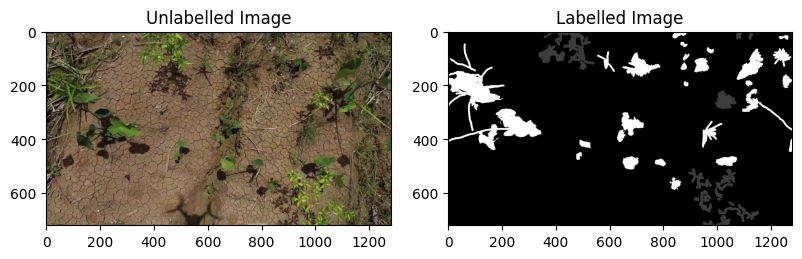

In [16]:
gs = gridspec.GridSpec(1, 8)
gs.update(wspace=0.4, hspace=0.2)
plt.figure(figsize=(20,20))
ax0 = plt.subplot(gs[0, 2:4],)
ax1 = plt.subplot(gs[0, 4:6],)


ax0.set_title('Unlabelled Image')
ax1.set_title('Labelled Image')


ax0.imshow(unlabelled_rgb_array)
ax1.imshow(labelled_rgb_array_assigned)


**Step 4. Saving and downloading the image.**
**i)** Before saving the image, it must be converted from the array format to an image using the pil fromarray function.
**ii)** The image can now be saved using the pil save function. The image will be downloaded to the specified desired_file_path and named as the new_file_name with the specified file_type. You can alter the file_path and new_file_type here as needed.



In [17]:
my_new_image = im.fromarray(unlabelled_rgb_array)
my_labelled_image_assigned = im.fromarray(labelled_rgb_array_assigned)

desired_file_path= file_path
new_file_type= '.png'

new_file_name= str(file_name) + '_unlabelled_edited'
new_file_name_labelled= str(file_name) + '_labelled_edited'

my_new_image.save(desired_file_path + new_file_name + new_file_type)
my_labelled_image_assigned.save(desired_file_path + new_file_name_labelled + new_file_type)

Alternatively, if you are using the file_url, please use the commented code below instead of the block above
**i)** Specify your desired file path an file type as needed. The image name will automatically be generated based on the original image name in the file url.

In [18]:
#my_new_image = im.fromarray(unlabelled_rgb_array)
#my_labelled_image_assigned = im.fromarray(labelled_rgb_array_assigned)

#define your variables-----------------------------
#desired_file_path='C:/Users/Aspire/Downloads/'
#new_file_type='.png'
#--------------------------------------------------

#file_url_list=file_url.split('/')
#file_name=file_url_list[len(file_url_list)-1].split('.')[0]

#file_url_labelled_list=file_url_labelled.split('/')
#file_name_labelled=file_url_labelled_list[len(file_url_labelled_list)-1].split('.')[0]

#new_file_name= str(file_name) + '_unlabelled_edited'
#new_file_name_labelled= str(file_name_labelled) + '_labelled_edited'

#my_new_image.save(desired_file_path + new_file_name + new_file_type)
#my_labelled_image_assigned.save(desired_file_path + new_file_name_labelled + new_file_type)

*Congratulations! We're at the end of this tutorial. Check your local machine for the downloaded images.*